In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Text Classification of Movie Reviews

Unpack data - this only works on linux and (maybe?) OS X. Unpack using 7zip on Windows.

In [2]:
#! tar -xf data/aclImdb.tar.bz2 --directory data

In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

In [4]:
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))

Number of documents in training data: 25000
[12500 12500]


In [5]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in test data: 25000
[12500 12500]


Subsample for interactivity

In [6]:
text_train, y_train = text_train, y_train
text_test, y_test = text_test, y_test

In [7]:
from IPython.display import HTML

In [8]:
print(text_train[0])

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."


In [9]:
HTML(text_train[0].decode("utf-8"))

In [10]:
print(y_train[0])

1


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#cv = CountVectorizer()
cv = TfidfVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

74849

In [35]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[5000:5020])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']
['augustine', 'augusto', 'augustus', 'auh', 'auie', 'auld', 'aulin', 'aulis', 'aumont', 'aunt', 'auntie', 'aunties', 'aunts', 'aunty', 'aur', 'aura', 'aural', 'aurally', 'auras', 'aured']


In [36]:
X_train = cv.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.float64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [37]:
print(text_train[7390])

b"An unfunny, unworthy picture which is an undeserving end to Peter Sellers' career. It is a pity this movie was ever made."


In [38]:
X_train[7390].nonzero()[1]

array([72773, 72196, 70318, 69645, 69440, 67125, 66562, 58718, 50155,
       49865, 49493, 44147, 40170, 34683, 34585, 22737, 21770, 10642,  3167], dtype=int32)

In [39]:
X_test = cv.transform(text_test)

In [40]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [41]:
svm.score(X_train, y_train)

0.98995999999999995

In [42]:
svm.score(X_test, y_test)

0.87719999999999998

In [43]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");


<IPython.core.display.Javascript object>


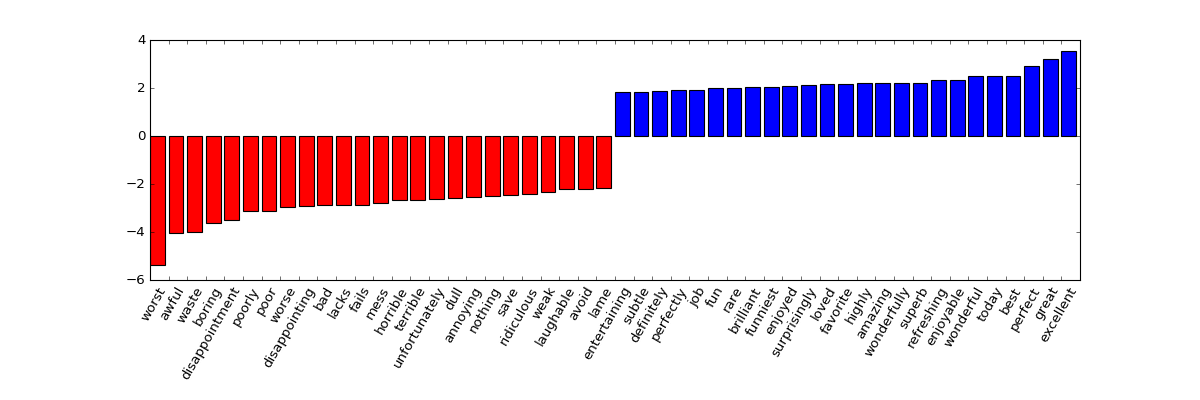

In [44]:
visualize_coefficients(svm, cv.get_feature_names())

In [30]:
#cv = CountVectorizer(ngram_range=(1, 2))
cv = TfidfVectorizer(ngram_range=(1, 2))
cv.fit(text_train)
len(cv.vocabulary_)

1513832

In [31]:
X_test = cv.transform(text_test)
X_train = cv.transform(text_train)

In [32]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<IPython.core.display.Javascript object>


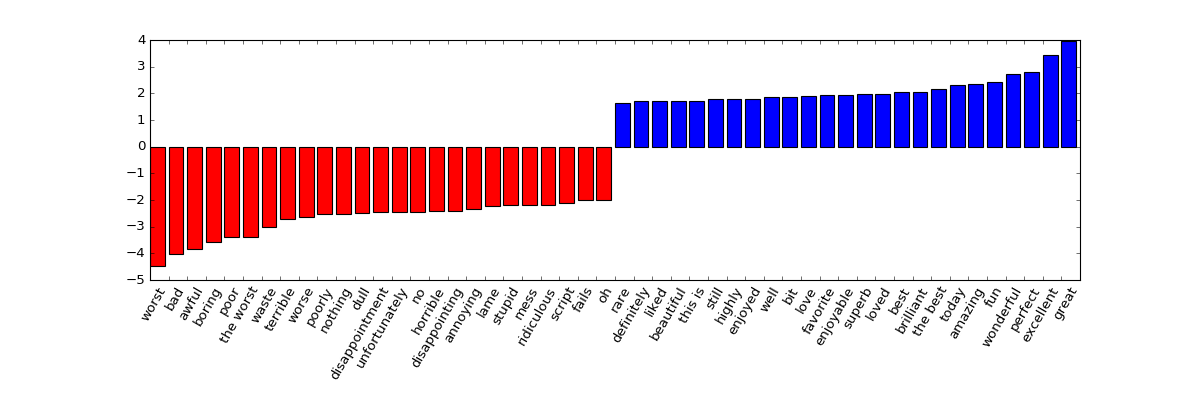

In [33]:
visualize_coefficients(svm, cv.get_feature_names())

## Look at SpaCy and NLTK

# Exercises
* Create a pipeine using the count vectorizer and SVM (see 07). Train and score using the pipeline.
* vizualize the coefficients of the svm inside the pipeline using pipeline.named_steps['linearsvc'] and pipeline.named_steps['countvectorizer']
* Grid search the C in the LinearSVC using the pipeline.

* Vary the n_gram_range in the count vectorizer, visualize the changed coefficients.
* Grid search the C in the LinearSVC together with the ngram_range (try (1,1), (1, 2), (2, 2))
* Visualize the parameter again for the grid-searched model

In [ ]:
# %load solutions/text_pipeline.py